In [305]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score

from collections import Counter

## Ensemble Results Exploration

In [306]:
data_path = 'ensemble_cache/ensemble_results.csv'

In [307]:
df = pd.read_csv(data_path)

In [308]:
df.head()

,id,taxonomic_level,joint_prediction,image_prediction,meta_prediction,true_label
0,4126,taxon_family_name,Elephantidae,Elephantidae,Elephantidae,Elephantidae
1,4126,taxon_genus_name,Loxodonta,Loxodonta,Loxodonta,Loxodonta
2,4126,taxon_species_name,Loxodonta africana,Loxodonta africana,Loxodonta africana,Loxodonta africana
3,16346,taxon_family_name,Elephantidae,Elephantidae,Elephantidae,Elephantidae
4,16346,taxon_genus_name,Loxodonta,Loxodonta,Loxodonta,Loxodonta


### Calculate the number of Miss-classifications
The ensemble method stops decreasing the taxonomic level prediction when a miss-classification occurs. 
Therefore the number of miss-classifications downs to the sub-species level can be calculated as follows.

In [309]:
error_count = len(df[df['joint_prediction'] != df['true_label']])

In [310]:
print(error_count)

398


Determine the number of unique observations within the predictions to determine the size of the dataset.

In [311]:
dataset_size = df['id'].nunique()

Calculate the error percentage

In [312]:
error_percent = error_count / dataset_size

In [313]:
print(error_percent)

0.1513883605933815


The ensemble method produces a total of 0.13 miss-classification rate. 
Hence the accuracy of the ensemble method is approximately 0.87

In [314]:
print(1 - error_percent)

0.8486116394066185


### Taxonomic Reports
Generate both the classification report and the accuracy report per taxonomic level. 

#### Family

In [315]:
df_family = df[df['taxonomic_level'] == 'taxon_family_name']

In [316]:
report_family = classification_report(df_family['joint_prediction'], df_family['true_label'])

In [317]:
print(report_family)

              precision    recall  f1-score   support

Elephantidae       0.99      0.99      0.99      1364
     Felidae       0.99      0.99      0.99      1268

    accuracy                           0.99      2632
   macro avg       0.99      0.99      0.99      2632
weighted avg       0.99      0.99      0.99      2632



In [318]:
accuracy_family = accuracy_score(df_family['joint_prediction'], df_family['true_label'])

In [319]:
print(accuracy_family)

0.9927811550151976


#### Genus

In [320]:
df_genus = df[df['taxonomic_level'] == 'taxon_genus_name']

In [321]:
report_genus = classification_report(df_genus['joint_prediction'], df_genus['true_label'], zero_division=1)

In [322]:
print(report_genus)

              precision    recall  f1-score   support

    Acinonyx       0.90      0.89      0.89        62
     Caracal       0.84      0.31      0.46        51
    Catopuma       0.00      0.00      0.00         3
     Elephas       0.96      0.79      0.87       228
       Felis       0.61      0.52      0.56        33
 Herpailurus       0.92      0.29      0.44        38
   Leopardus       0.71      0.70      0.70        80
 Leptailurus       0.78      0.18      0.29        39
   Loxodonta       0.96      0.99      0.98      1125
        Lynx       0.74      0.98      0.85       454
    Neofelis       1.00      0.00      0.00         4
  Otocolobus       1.00      0.00      0.00        21
    Panthera       0.82      0.96      0.88       292
  Pardofelis       0.00      1.00      0.00         0
Prionailurus       0.57      0.22      0.32        18
        Puma       0.86      0.53      0.65       165

    accuracy                           0.87      2613
   macro avg       0.73   

In [323]:
accuracy_genus = accuracy_score(df_genus['joint_prediction'], df_genus['true_label'])

In [324]:
print(accuracy_genus)

0.872177573670111


#### Species

In [325]:
df_species = df[df['taxonomic_level'] == 'taxon_species_name']

In [326]:
report_species = classification_report(df_species['joint_prediction'], df_species['true_label'], zero_division=1)

In [327]:
print(report_species)

                          precision    recall  f1-score   support

         Caracal caracal       1.00      1.00      1.00        16
             Felis chaus       1.00      1.00      1.00         5
            Felis lybica       1.00      1.00      1.00         9
        Felis silvestris       1.00      1.00      1.00         3
     Leopardus geoffroyi       0.00      1.00      0.00         0
        Leopardus guigna       1.00      0.00      0.00         1
      Leopardus guttulus       1.00      0.00      0.00         2
      Leopardus pardalis       0.88      0.94      0.91        48
      Leopardus tigrinus       1.00      0.50      0.67         2
        Leopardus wiedii       0.00      0.00      0.00         3
      Loxodonta africana       1.00      1.00      1.00      1104
      Loxodonta cyclotis       0.75      0.86      0.80        14
         Lynx canadensis       1.00      0.38      0.56        26
               Lynx lynx       1.00      1.00      1.00         3
         

In [328]:
accuracy_species = accuracy_score(df_species['joint_prediction'], df_species['true_label'])

In [329]:
print(accuracy_species)

0.9803921568627451


#### Sub-species

In [330]:
df_subspecies = df[df['taxonomic_level'] == 'sub_species']
report_subspecies = classification_report(df_subspecies['joint_prediction'], df_subspecies['true_label'], zero_division=1)

In [331]:
print(report_subspecies)

                                precision    recall  f1-score   support

        Acinonyx jubatus hecki       1.00      1.00      1.00         2
      Acinonyx jubatus jubatus       1.00      1.00      1.00        45
       Caracal caracal caracal       1.00      1.00      1.00         3
    Elephas maximus borneensis       1.00      1.00      1.00        13
       Elephas maximus indicus       0.99      1.00      0.99        82
       Elephas maximus maximus       1.00      1.00      1.00        60
    Elephas maximus sumatranus       1.00      0.75      0.86         4
            Felis lybica cafra       1.00      1.00      1.00         4
           Felis lybica lybica       0.50      1.00      0.67         1
           Felis lybica ornata       1.00      0.00      0.00         1
   Felis silvestris silvestris       1.00      1.00      1.00         2
      Leopardus pardalis mitis       1.00      0.00      0.00         1
   Leopardus pardalis pardalis       0.67      1.00      0.80  

In [332]:
accuracy_subspecies = accuracy_score(df_subspecies['joint_prediction'], df_subspecies['true_label'])

In [333]:
print(accuracy_subspecies)

0.9852941176470589


#### Accuracies down the taxonomic hierarchy

In [334]:
df_accuracy = accuracy_collection(df)

In [335]:
df_accuracy

,taxonomic_level,accuracy,method
0,taxon_family_name,0.992781,joint-classification
1,taxon_family_name,0.985942,image-classification
2,taxon_family_name,0.931231,meta-classification
3,taxon_genus_name,0.872178,joint-classification
4,taxon_genus_name,0.840796,image-classification
5,taxon_genus_name,0.697283,meta-classification
6,taxon_species_name,0.980392,joint-classification
7,taxon_species_name,0.911765,image-classification
8,taxon_species_name,0.939112,meta-classification
9,sub_species,0.985294,joint-classification


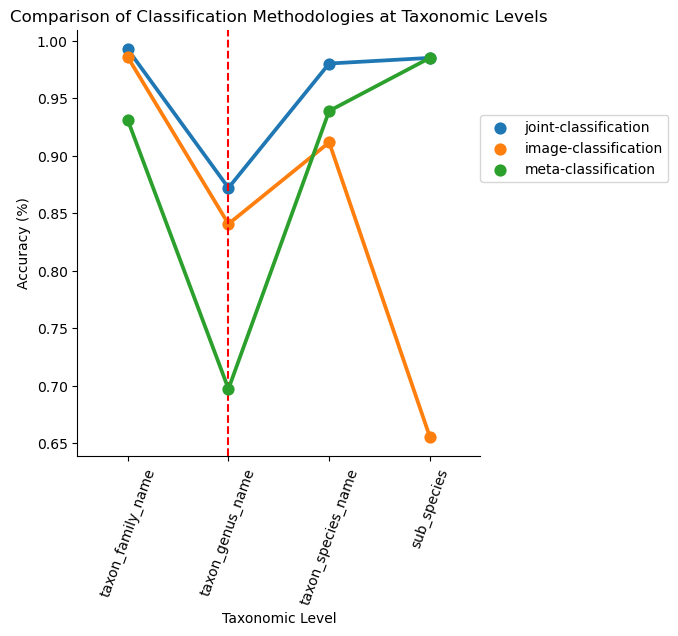

In [376]:
g = sns.catplot(data=df_accuracy, x='taxonomic_level', y='accuracy', hue='method', kind='point')
g.refline(x=1, color='red')
g._legend.remove()
g.set(xlabel=None)
g.set(ylabel=None)

plt.xticks(rotation=70)
plt.title('Comparison of Classification Methodologies at Taxonomic Levels')
plt.xlabel('Taxonomic Level')
plt.ylabel('Accuracy (%)')
plt.legend(bbox_to_anchor=(1.0, 0.8), loc='upper left', borderaxespad=0)
plt.show()

In [337]:
def accuracy_collection(df: pd.DataFrame):
    df_accuracy = pd.DataFrame()
    levels = ['taxon_family_name', 'taxon_genus_name', 'taxon_species_name', 'sub_species']
    for level in levels:
        df_level = df[df['taxonomic_level'] == level]  # Assign taxonomic level search
        
        joint_accuracy = accuracy_score(df_level['joint_prediction'], df_level['true_label'])  # Generate joint accuracy
        image_accuracy = accuracy_score(df_level['image_prediction'], df_level['true_label'])  # Generate image accuracy
        meta_accuracy = accuracy_score(df_level['meta_prediction'], df_level['true_label'])  # Generate meta accuracy
        
        row = pd.DataFrame([{'taxonomic_level': level, 'accuracy': joint_accuracy, 'method': 'joint-classification'},
                           {'taxonomic_level': level, 'accuracy': image_accuracy, 'method': 'image-classification'},
                           {'taxonomic_level': level, 'accuracy': meta_accuracy, 'method': 'meta-classification'}])  # Generate row dataframe
        df_accuracy = pd.concat([df_accuracy, row], ignore_index=True)  # Add new row to existing dataframe
    return df_accuracy

### Taxonomic Level Individual Perspective
Showcase the difference between the ensemble method predictions at each taxonomic level and the image classification level. 

In [353]:
differences = individual_difference(df).reset_index()

In [354]:
differences.head()

,index,precision,recall,f1-score,support,level
0,Elephantidae,0.005878,0.007309,0.006596,-2.0,taxon_family_name
1,Felidae,0.007868,0.006329,0.007101,2.0,taxon_family_name
2,Acinonyx,0.000000,0.000000,0.000000,0.0,taxon_genus_name
3,Caracal,0.000000,0.047059,0.052080,-9.0,taxon_genus_name
4,Catopuma,0.000000,0.000000,0.000000,3.0,taxon_genus_name


#### Overall

In [355]:
differences_mean = differences.groupby('level').agg({'precision': 'mean', 'recall': 'mean', 'f1-score': 'mean'})

In [356]:
differences_mean.head()

,precision,recall,f1-score
level,,,
sub_species,0.255598,0.294595,0.308941
taxon_family_name,0.006873,0.006819,0.006848
taxon_genus_name,0.024131,0.028038,0.032982
taxon_species_name,0.163255,0.173460,0.186634


In [357]:
differences_mean = differences_mean.reindex(['taxon_family_name', 'taxon_genus_name', 'taxon_species_name', 'sub_species'])

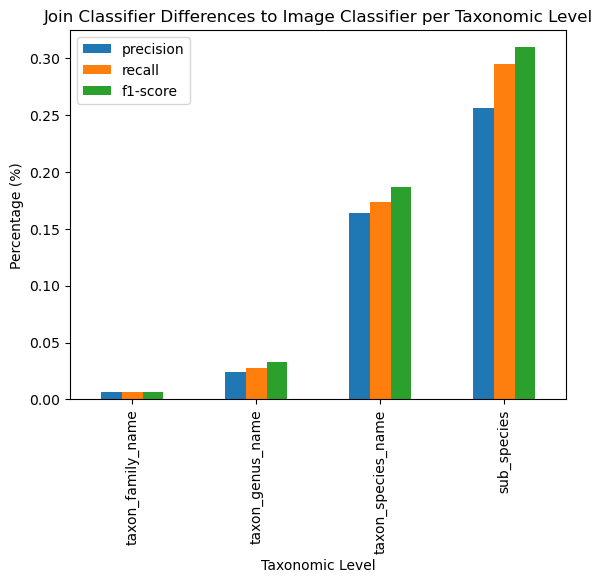

In [378]:
differences_mean.plot(kind='bar')

plt.title('Join Classifier Differences to Image Classifier per Taxonomic Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Taxonomic Level')
plt.show()

#### Family

<AxesSubplot: xlabel='index'>

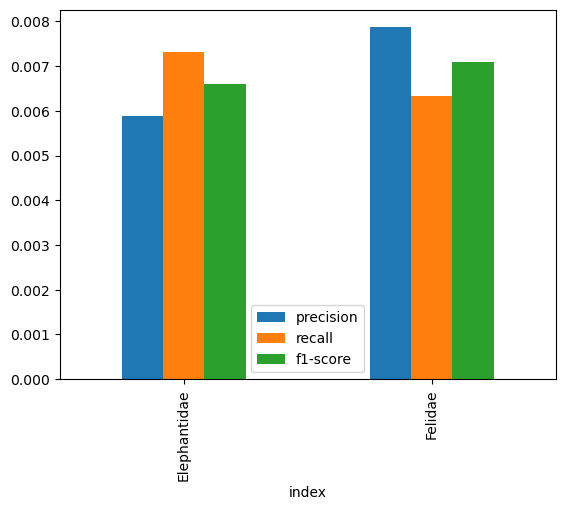

In [359]:
family_diff = differences[differences['level'] == 'taxon_family_name']

family_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

#### Genus

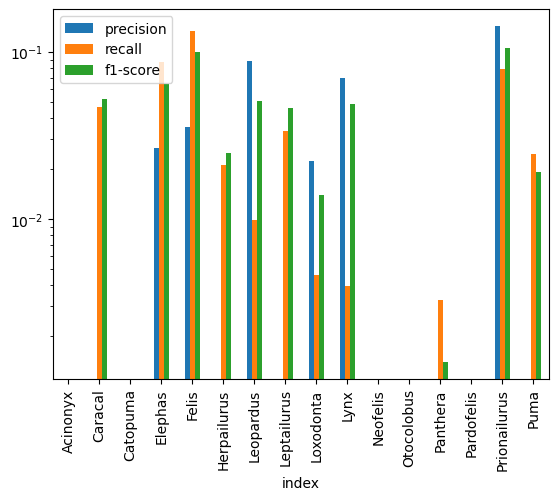

In [360]:
genus_diff = differences[differences['level'] == 'taxon_genus_name']

genus_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.yscale('log')
plt.show()

#### Species

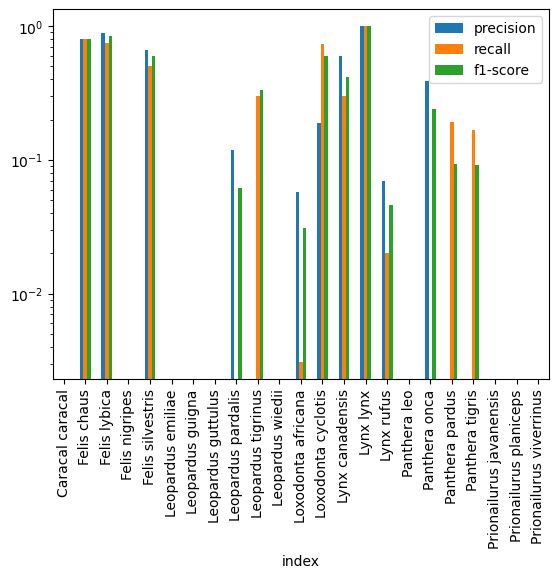

In [361]:
species_diff = differences[differences['level'] == 'taxon_species_name']

species_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.yscale('log')
plt.show()

#### Sub-species

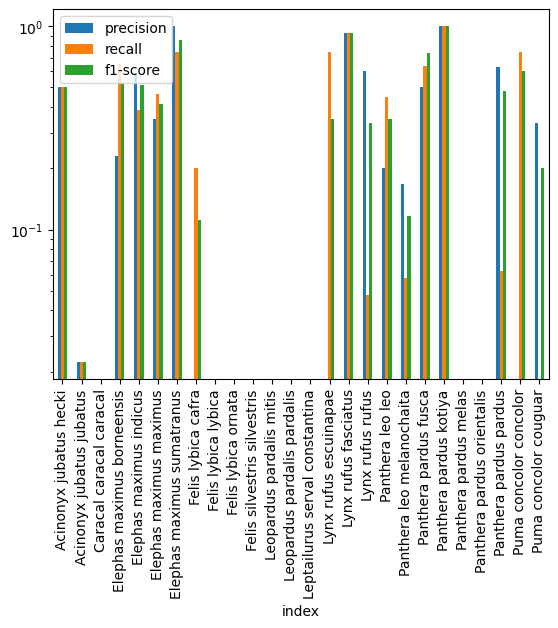

In [362]:
subspecies_diff = differences[differences['level'] == 'sub_species']

subspecies_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.yscale('log')
plt.show()

In [352]:
def individual_difference(df: pd.DataFrame):
    df_individual = pd.DataFrame()
    levels = ['taxon_family_name', 'taxon_genus_name', 'taxon_species_name', 'sub_species']
    for level in levels:
        df_level = df[df['taxonomic_level'] == level]  # Assign taxonomic level search
        
        joint_accuracy = classification_report(df_level['joint_prediction'], df_level['true_label'], output_dict=True, zero_division=0)  # Generate joint accuracy
        image_accuracy = classification_report(df_level['image_prediction'], df_level['true_label'], output_dict=True, zero_division=0)  # Generate image accuracy
    
        df_joint = pd.DataFrame(joint_accuracy).T
        df_image = pd.DataFrame(image_accuracy).T
        
        
        df_joint = df_joint[df_joint['support'] != 0]  # Remove classes with no observations in test set
        df_image = df_image[df_image['support'] != 0]
        
        
        df_joint.drop(df_joint.tail(3).index, inplace = True)
        df_image.drop(df_image.tail(3).index, inplace = True)
        
        difference = df_joint.subtract(df_image, axis=0, fill_value=0)
        difference['level'] = level
        df_individual = pd.concat([df_individual, difference])
    return df_individual
        
        